# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer' + str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer' + str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)

    model = keras.models.Model(inputs=[input_layer], outputs = [out])
    return model

In [16]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-5, 1e-4, 1e-3, 1e-1]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.85
multi_optimizer = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [22]:
results = {}
import itertools
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
## itertools.product 可以加兩個list 做所有組合 [a,b] [c,d] --> [a,c] [a,d] [b,c] [b,d]

for lr, opt in itertools.product(LEARNING_RATE, multi_optimizer):
        keras.backend.clear_session()
        print(f"Experiment with lr = {lr}, optimizer = {opt}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()

        optimizer = opt(lr = lr)
        model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

        model.fit(x_train, y_train,
                  epochs = EPOCHS,
                  batch_size = BATCH_SIZE,
                  validation_data = (x_test, y_test),
                  shuffle = True)
        
        #Collect results
        train_loss = model.history.history['loss']
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = f'Exp-lr-{lr}-optimizer-{opt}'
        results[exp_name_tag] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}

Experiment with lr = 1e-05, optimizer = <class 'keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________

c:\Users\huang\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 3s 16ms/step - loss: 2.1305 - accuracy: 0.2434 - val_loss: 2.0151 - val_accuracy: 0.2974
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9606 - accuracy: 0.3181 - val_loss: 1.9184 - val_accuracy: 0.3357
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8843 - accuracy: 0.3461 - val_loss: 1.8599 - val_accuracy: 0.3551
Epoch 4/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8365 - accuracy: 0.3631 - val_loss: 1.8217 - val_accuracy: 0.3677
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8006 - accuracy: 0.3739 - val_loss: 1.7998 - val_accuracy: 0.3705
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7737 - accuracy: 0.3822 - val_loss: 1.7668 - val_accuracy: 0.3831
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7498 - accuracy: 0.3912 - val_loss: 1.7481 - val_accuracy: 0.3872

c:\Users\huang\anaconda3\lib\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


196/196 [==============================] - 2s 10ms/step - loss: 2.3667 - accuracy: 0.1130 - val_loss: 2.3558 - val_accuracy: 0.1152
Epoch 2/50
196/196 [==============================] - 2s 9ms/step - loss: 2.3466 - accuracy: 0.1194 - val_loss: 2.3388 - val_accuracy: 0.1237
Epoch 3/50
196/196 [==============================] - 2s 9ms/step - loss: 2.3320 - accuracy: 0.1250 - val_loss: 2.3262 - val_accuracy: 0.1274
Epoch 4/50
196/196 [==============================] - 2s 9ms/step - loss: 2.3211 - accuracy: 0.1300 - val_loss: 2.3164 - val_accuracy: 0.1322
Epoch 5/50
196/196 [==============================] - 2s 9ms/step - loss: 2.3125 - accuracy: 0.1335 - val_loss: 2.3087 - val_accuracy: 0.1347
Epoch 6/50
196/196 [==============================] - 2s 9ms/step - loss: 2.3056 - accuracy: 0.1377 - val_loss: 2.3023 - val_accuracy: 0.1406
Epoch 7/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2998 - accuracy: 0.1413 - val_loss: 2.2970 - val_accuracy: 0.1456
Epoch 8/50
196/1

c:\Users\huang\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1256 - accuracy: 0.2449 - val_loss: 1.9964 - val_accuracy: 0.3103
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9377 - accuracy: 0.3247 - val_loss: 1.8930 - val_accuracy: 0.3368
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8601 - accuracy: 0.3517 - val_loss: 1.8349 - val_accuracy: 0.3626
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8130 - accuracy: 0.3690 - val_loss: 1.7982 - val_accuracy: 0.3757
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7774 - accuracy: 0.3817 - val_loss: 1.7721 - val_accuracy: 0.3833
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7485 - accuracy: 0.3915 - val_loss: 1.7397 - val_accuracy: 0.3943
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7235 - accuracy: 0.4013 - val_loss: 1.7155 - val_accuracy: 0.4070

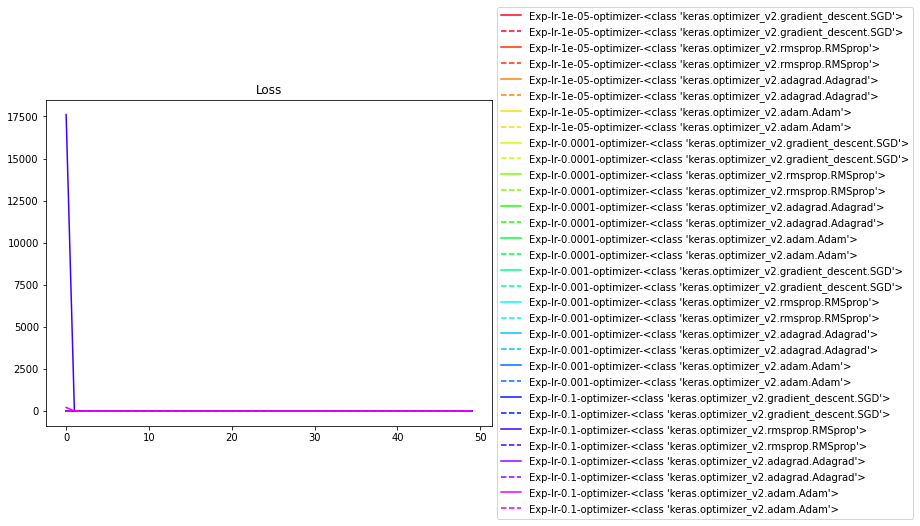

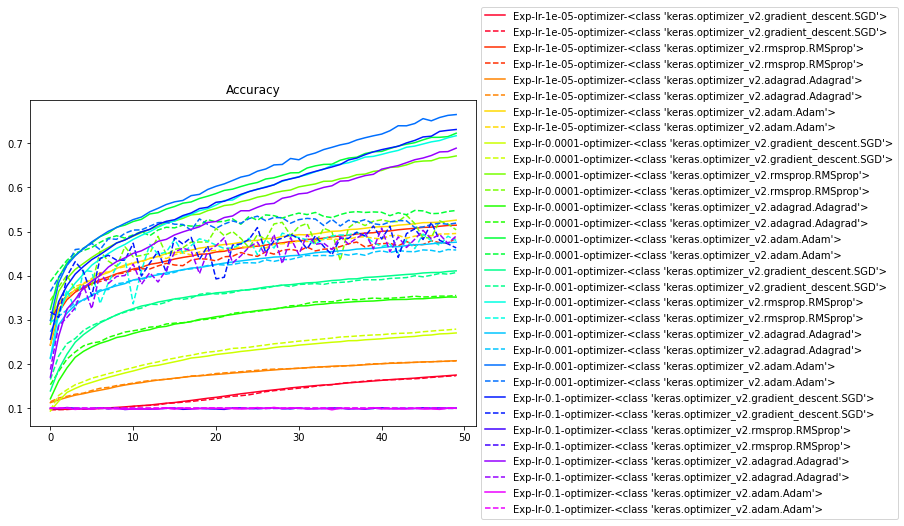

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()